Figure 6.2. 5-state random walk

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 7)

from sklearn.metrics import mean_squared_error

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# number of states
NUM_STATES = 5
STATES = np.arange(1, NUM_STATES + 1)
# STATE id happens to be the same as the true denormalized state value.
V_TRUE = STATES / (NUM_STATES + 1)

# Add 2 exit state, the state after exit actoin, whose state value will be 0
EXIT_STATES = [0, NUM_STATES + 1]

NUM_ALL_STATES = NUM_STATES + len(EXIT_STATES)

STARTING_STATE = (NUM_STATES + 1) / 2 + 1 # set starting state to the middle; +1 offset the first exit state

print(STATES)
print(V_TRUE)
print('starting at State: {0}'.format(int(STARTING_STATE)))

[1 2 3 4 5]
[ 0.16666667  0.33333333  0.5         0.66666667  0.83333333]
starting at State: 4


In [3]:
def is_reward_exit_state(state):
    return state == EXIT_STATES[-1]

In [4]:
def take_action(s0):
    rand = np.random.random()
    if rand >= 0.5:
        s1 = s0 - 1
    else:
        s1 = s0 + 1
        
    if is_reward_exit_state(s1):
        reward = 1
    else:
        reward = 0
    return s1, reward

In [5]:
def run_a_episode(v_func, s0=STARTING_STATE, alpha=0.1, gamma=1):
    while True:
        s1, reward = take_action(s0)
        v_func[s0] = v_func[s0] + alpha * (reward + gamma * v_func[s1] - v_func[s0])
        s0 = s1
        if s1 in EXIT_STATES:
            break
    return v_func

In [6]:
def init_v_func(num_all_states):
    """initialize value function"""
    v_func = np.repeat(0.5, NUM_ALL_STATES)
    # The value of EXIT_STATES should be 0
    v_func[0], v_func[-1] = 0, 0
    return v_func

working on 0
working on 1
working on 10
working on 100
working on 1000
working on 2000


/Users/zyxue/miniconda3/envs/kaggle/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(0, 1)

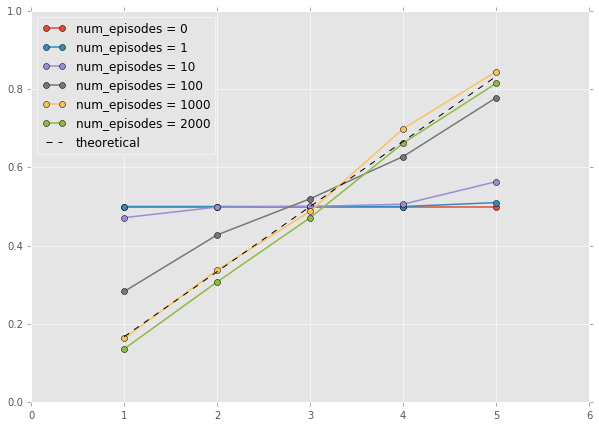

In [11]:
for num_episodes in [0, 1, 10, 100, 1000, 2000]:
    print('working on {0}'.format(num_episodes))
    v_func = init_v_func(NUM_ALL_STATES)
    for i in range(num_episodes):
        v_func = run_a_episode(v_func, alpha=0.02)

    # v_func[1:-1] no need to plot value of EXIT_STATES
    plt.plot(range(1, NUM_STATES + 1), v_func[1:-1], 'o-', lw=1.5,
             label='num_episodes = {0}'.format(num_episodes))

# plot theorectical line
plt.plot(range(1, NUM_STATES + 1), V_TRUE, '--', color='black',
         label='theoretical')

plt.legend(loc='best')
plt.xlim(0, NUM_STATES + 1)
plt.ylim(0, 1)

Interestingly, when alpha=0.1, 100 episodes seem to generate the best line, doing it even for more episodes doesn't seem to get closer to the theoretical values further.

Decreasing alpha to 0.03 makes it much converge better!

## See how RMS changes along number of episodes

In [12]:
mean_squared_error(V_TRUE, v_func[1:-1])

0.00056368814776025674

working on 0.01
working on 0.05
working on 0.1


/Users/zyxue/miniconda3/envs/kaggle/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


working on 0.2


(-0.01, 0.059999999999999998)

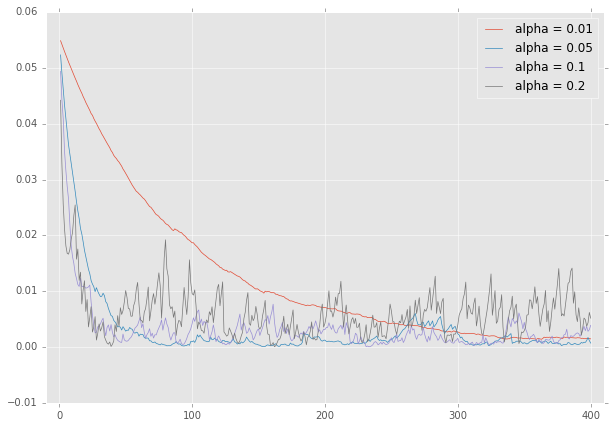

In [15]:
num_episodes = 400
for alpha in [0.01, 0.05, 0.1, 0.2]:
    print('working on {0}'.format(alpha))
    # The value of EXIT_STATES should be 0
    v_func = init_v_func(NUM_ALL_STATES)
    rms = []
    for i in range(num_episodes):
        v_func = run_a_episode(v_func, alpha=alpha)
        rms.append(mean_squared_error(V_TRUE, v_func[1:-1]))

    plt.plot(np.arange(num_episodes) + 1, rms, lw=0.7,
             label='alpha = {0}'.format(alpha))
    
plt.legend(loc='best')
plt.xlim(-10, num_episodes + 10)
plt.ylim(-0.01, plt.ylim()[1])

Larger alpha makes it hard to converge

# Monte Carlo (MC) Methods

todo